<a href="https://colab.research.google.com/github/guhasouvik/LungCancer_classifier/blob/main/LASSO_FEATURE_EXTRACTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [158]:
df = pd.read_excel('/content/drive/MyDrive/bioinfo/Lung.xlsx',header=None)

In [129]:
print("Shape of the Dataset: {}".format(df.shape))

Shape of the Dataset: (52, 16383)


In [130]:
X = df.iloc[1:, 1:16384].values
Y = df.iloc[1:, 0].values

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle= True)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [132]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle= True)
print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (35, 16382)
Shape of Test Features: (16, 16382)
Shape of Train Target: (35,)
Shape of Test Target: (16,)


In [133]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.000001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, Y)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-06}


In [134]:
names=df.iloc[0:1, 1:]
names=names.to_numpy().ravel()

In [136]:
lasso1 = Lasso(alpha=0.000001)
lasso1.fit(X_train, y_train)
# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

In [137]:
len(lasso1_coef)

16382

In [138]:
indices = [i for i, x in enumerate(lasso1_coef) if x == 0]

In [139]:
len(indices)

13855

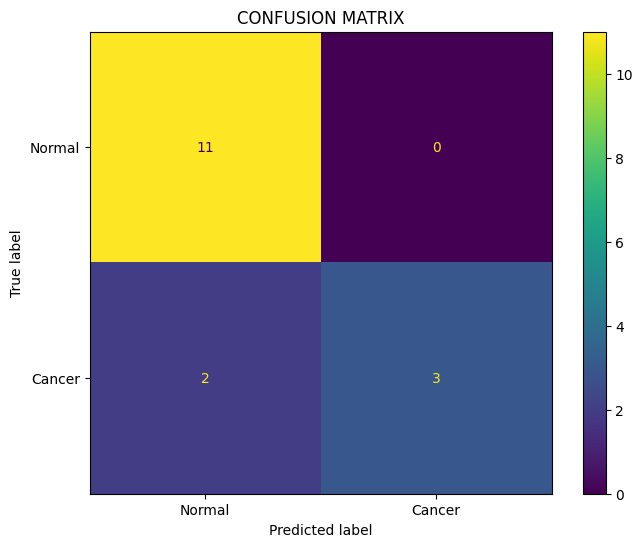

In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = lasso1.predict(X_test)
y_pred=y_pred.round()
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=["Normal","Cancer"])
ax.set(title='CONFUSION MATRIX')
#cm_display.plot()
cm_display.plot(ax=ax)

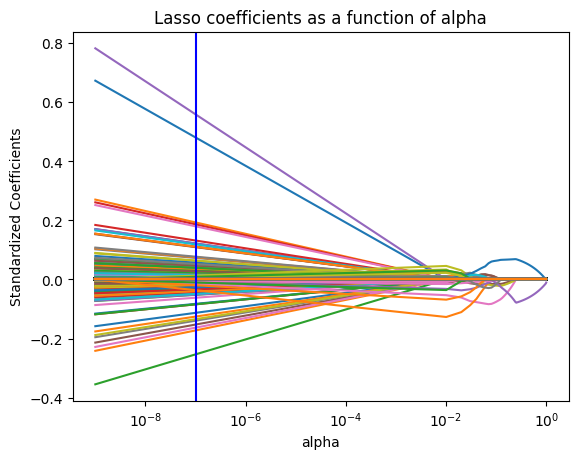

In [91]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.000000001,1,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
plt.axvline(x = 0.0000001, color = 'b', linestyle="-", label = 'axvline - full height')
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

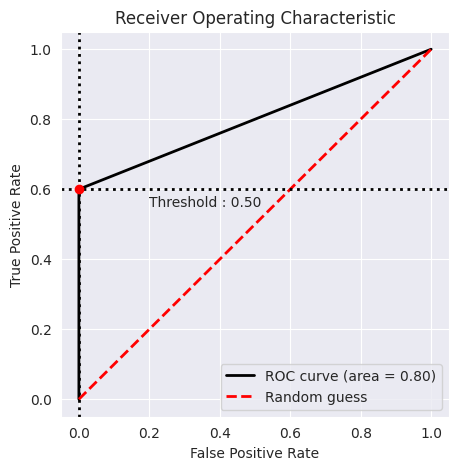

In [146]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [147]:
for i in sorted(indices, reverse=True):
  names=np.delete(names, i)

In [148]:
print(names)

['1007_s_at' '1053_at' '117_at' ... '215976_at' '216121_at' '216732_at']


In [149]:
DF = pd.DataFrame(names)

# save the dataframe as a csv file
DF.to_csv("data1.csv")

In [159]:
df1 = pd.read_excel('/content/drive/MyDrive/bioinfo/Lung.xlsx')

In [162]:
selected_features=df1[names]


In [163]:
selected_features.to_excel("selected_features.xlsx", index=False)